# 0.0 - Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
from sklearn import metrics as mt
from matplotlib import pyplot as plt

/home/aderaldo/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1.0 - Load Dataset

## 1.1 - Load Training Dataset

In [2]:
x_train = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/regressão/X_training.csv')

In [3]:
y_train = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/regressão/y_training.csv')

## 1.2 - Load Test Dataset

In [4]:
x_test = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/regressão/X_test.csv')

In [5]:
y_test = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/regressão/y_test.csv')

## 1.3 - Load Validation Dataset

In [6]:
x_val = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/regressão/X_validation.csv')

In [7]:
y_val = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/regressão/y_val.csv')

# 2.0 Training Model

## 2.1 - Fine Tunning

In [8]:
alpha_values = np.arange(2, 40, 2)
r2_values = []

for i in alpha_values:
    model = lm.Ridge( alpha = i )
    model.fit( x_train, y_train )
    y_pred_final = model.predict( x_val )
    r2 = mt.r2_score( y_val, y_pred_final )
    r2_values.append( r2 )

In [9]:
results = { "alpha_values": alpha_values, "r2_values":r2_values }
results_df = pd.DataFrame( results )

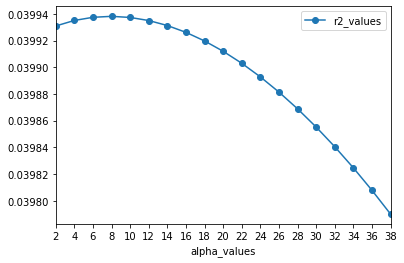

In [10]:
fig, ax = plt.subplots()
results_df.plot(x='alpha_values', y='r2_values', marker = 'o', ax=ax)
ax.set_xlim(2, 38)
ax.set_xticks(np.arange(2, 40, 2));

## 2.1 - Training Over Training Dataset

In [11]:
model = lm.Lasso( alpha = 8 )

model.fit( x_train, y_train )

y_pred_train = model.predict( x_train )

mt.r2_score( y_train, y_pred_train)

0.0

### Metrics

In [12]:
# r2
mt.r2_score( y_train, y_pred_train)

0.0

In [13]:
#MSE
mt.mean_squared_error( y_train, y_pred_train )

478.012559979818

In [14]:
#RMSE
mt.mean_squared_error(  y_train, y_pred_train, squared = False )

21.863498347241183

In [15]:
#MAE
mt.mean_absolute_percentage_error( y_train, y_pred_train )

8.742212844953096

In [16]:
#MAPE
mt.mean_absolute_error( y_train, y_pred_train )

17.3650904457618

## 2.2 - Training Over Test Dataset

In [17]:
y_pred_test = model.predict( x_test )

### Metrics

In [18]:
# r2
mt.r2_score( y_test, y_pred_test)

-0.0001242400734962068

In [19]:
#MSE
mt.mean_squared_error(y_test, y_pred_test )

486.96146850013093

In [20]:
#RMSE
mt.mean_squared_error( y_test, y_pred_test, squared = False )

22.06720345898254

In [21]:
#MAE
mt.mean_absolute_percentage_error( y_test, y_pred_test)

8.714549642759494

In [22]:
#MAPE
mt.mean_absolute_error( y_test, y_pred_test)

17.551491953962177

## 2.3 Training Over Validation Dataset

In [23]:
y_pred_val = model.predict( x_val )

In [24]:
# r2
mt.r2_score( y_val, y_pred_val)

-7.197077047660372e-07

In [25]:
#MSE
mt.mean_squared_error( y_val, y_pred_val)

477.5119556252973

In [26]:
#RMSE
mt.mean_squared_error( y_val, y_pred_val, squared = False )

21.85204694359998

In [27]:
#MAE
mt.mean_absolute_percentage_error( y_val, y_pred_val)

8.678722362628074

In [28]:
#MAPE
mt.mean_absolute_error( y_val, y_pred_val )

17.352835945449478